In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from wbfm.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np
from wbfm.utils.feature_detection.class_frame_pair import FramePair



Bad key "text.kerning_factor" on line 4 in
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [206]:
fname = "/home/charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True)

Original fname /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/global2tracklet_manual-4.pickle exists, so will be suffixed
Removed suffix -4, so the basename is taken as: global2tracklet_manual
Original fname /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/manually_split_tracklets-4.h5 exists, so will be suffixed
Removed suffix -4, so the basename is taken as: manually_split_tracklets
Output files: /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/global2tracklet_manual-4.pickle, /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/manually_split_tracklets-4.h5, /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/split_names.pickle, /home/charles/dlc_stacks/worm3-tracklet_wiggle/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/home/charles/dlc_stacks/worm3-tracklet_wiggle 
Found the following raw data files:
red_data:              

# Select a segmentation that I know is under-segmented

Start with group meeting target:

neuron_017 at t=258

In [6]:
t = 260

seg_dat = project_data.raw_segmentation[t]

In [7]:
v = napari.view_labels(seg_dat);

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/napari/plugins/_plugin_manager.py:510: UserWarning: Plugin 'napari-animated-gif-io' has already registered a function widget 'save as animated gif' which has now been overwritten
  warn(message=warn_message)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot

# Use function on this volume

In [8]:
from segmentation.util.utils_postprocessing import split_neuron_interactive

In [25]:
full_mask = project_data.raw_segmentation[t]
red_volume = project_data.red_data[t]
i_target = 77
min_separation = 2

In [31]:
new_full_mask = split_neuron_interactive(full_mask, red_volume, i_target,
                             min_separation,
                             which_neuron_keeps_original='top', verbose=2)

Split point is 5 using gaussian method


In [33]:
v = napari.view_labels(new_full_mask);


/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/napari/plugins/_plugin_manager.py:510: UserWarning: Plugin 'napari-animated-gif-io' has already registered a function widget 'save as animated gif' which has now been overwritten
  warn(message=warn_message)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot

# Debug in more detail

In [40]:

# Calculate the brightness per plane
brightness_per_plane = []
planes_where_neuron_exists = []
individual_plane_masks = []

planes_with_single_neuron = []

for i, plane in enumerate(full_mask):
    if i_target in plane:
        plane_mask = plane == i_target
        plane_red = red_volume[i]
        brightness_per_plane.append(np.sum(plane_red[plane_mask]))
        
        planes_with_single_neuron.append(np.where(plane_mask, plane_red, 0))
        
        planes_where_neuron_exists.append(i)
        individual_plane_masks.append(plane_mask)
assert len(brightness_per_plane) > 0, f"Neuron {i_target} not found!"

In [23]:
from segmentation.util.utils_postprocessing import calc_split_point_via_brightnesses

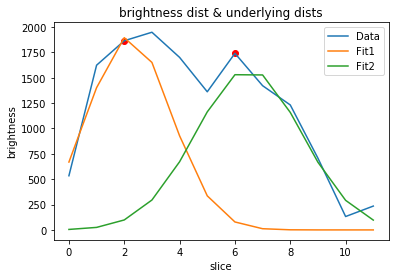

In [24]:
out = calc_split_point_via_brightnesses(brightness_per_plane,
                                                        min_separation=min_separation, min_height=5,
                                                       plots=1, return_all=True)

In [46]:
all_dots = []
for i in range(len(planes_with_single_neuron)-1):
    all_dots.append(np.linalg.norm(planes_with_single_neuron[i]*planes_with_single_neuron[i+1]))

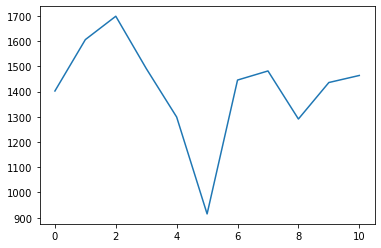

In [50]:
plt.plot(all_dots)

# Try deconvolution

In [52]:
from scipy.signal import deconvolve

In [77]:
t = 638

full_mask = project_data.raw_segmentation[t]
red_volume = project_data.red_data[t]
i_target = 73
min_separation = 2

In [82]:

# Calculate the brightness per plane
brightness_per_plane = []
planes_where_neuron_exists = []
individual_plane_masks = []

planes_with_single_neuron = []

for i, plane in enumerate(full_mask):
    if i_target in plane:
        plane_mask = plane == i_target
        plane_red = red_volume[i]
        brightness_per_plane.append(np.sum(plane_red[plane_mask]))
        
        planes_with_single_neuron.append(np.where(plane_mask, plane_red, 0))
        
        planes_where_neuron_exists.append(i)
        individual_plane_masks.append(plane_mask)
assert len(brightness_per_plane) > 0, f"Neuron {i_target} not found!"

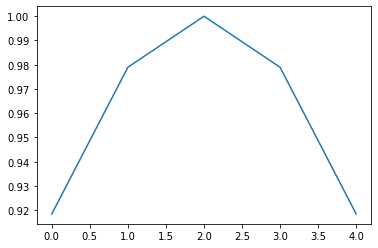

In [88]:
# template = [1, 800, 1000, 800, 1]
template = np.exp(-( (np.linspace(0,7, num=5)-3.5)/float(12))**2 )
plt.plot(template)

In [89]:
padded = brightness_per_plane.copy()
padded.insert(0, 15)
padded.insert(0, 15)
padded.insert(0, 15)

padded.insert(-1, 15)
padded.insert(-1, 15)
padded.insert(-1, 15)

out = deconvolve(padded, divisor=template)

In [90]:
out

(array([ 1.63318901e+01, -1.07596815e+00, -3.03297746e-01,  1.79801552e+03,
         1.22136834e+02,  4.75478898e+02,  2.60752790e+02,  2.84505759e+02,
         8.66764298e+02,  4.58382146e+02,  3.96856474e+02, -5.73975348e+01,
         1.57350560e+02,  3.99425963e+02]),
 array([ 1.77635684e-15,  1.77635684e-15,  1.77635684e-15,  0.00000000e+00,
         2.27373675e-13, -4.54747351e-13,  0.00000000e+00,  0.00000000e+00,
        -2.27373675e-13,  0.00000000e+00,  0.00000000e+00, -4.54747351e-13,
         0.00000000e+00,  2.27373675e-13, -8.41673984e+02, -4.85748746e+02,
        -5.20539306e+02,  1.00914782e+03]))

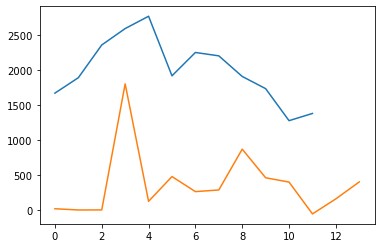

In [91]:
plt.plot(brightness_per_plane)
plt.plot(out[0])

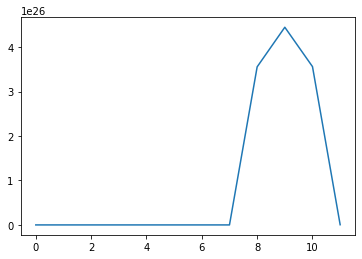

In [61]:
plt.plot(out[1])

In [92]:
'Hello'.lower()


'hello'

# Refactor the metadata calculations (WAY TOO SLOW for now)

In [127]:
from segmentation.util.utils_metadata import get_metadata_dictionary, OLD_get_metadata_dictionary
from wbfm.utils.postprocessing.utils_metadata import regionprops_one_volume_one_channel
from wbfm.utils.projects.utils_neuron_names import name2int_neuron
from collections import defaultdict

In [97]:
t = 0
seg = project_data.raw_segmentation[t]
dat = project_data.red_data[t]

In [128]:
# %%timeit -n 3
out = get_metadata_dictionary(seg, dat)

In [129]:
out2 = OLD_get_metadata_dictionary(seg, dat)

In [130]:
out

,neuron_volume,centroids,total_brightness,label
1,1273,"(4.8771146066011655, 297.7740983145629, 424.04...",64019,1
2,909,"(4.5420842803383135, 313.3114124967398, 433.15...",26839,2
3,1160,"(5.850456465458509, 279.90286483172093, 417.99...",58712,3
4,703,"(6.150039738760841, 300.02505269705244, 349.52...",28939,4
5,806,"(6.238351989685284, 308.2635234132333, 399.324...",34126,5
...,...,...,...,...
172,645,"(20.14507080796333, 230.85769993842786, 472.53...",29234,172
173,512,"(22.06905843405959, 223.39013780891523, 489.68...",25978,173
174,625,"(23.28299431215656, 192.6365082425528, 521.635...",20746,174
175,360,"(26.62723594548552, 275.5150127768313, 422.329...",9392,175


In [131]:
out2

,total_brightness,neuron_volume,centroids,all_values
1,64019,1273,"(4.8771146066011655, 297.7740983145629, 424.04...","[24, 24, 21, 22, 25, 25, 26, 27, 24, 23, 22, 2..."
2,26839,909,"(4.5420842803383135, 313.3114124967398, 433.15...","[19, 19, 19, 18, 22, 20, 17, 16, 18, 21, 21, 2..."
3,58712,1160,"(5.850456465458509, 279.90286483172093, 417.99...","[21, 22, 23, 24, 24, 22, 24, 22, 24, 25, 26, 2..."
4,28939,703,"(6.150039738760841, 300.02505269705244, 349.52...","[19, 21, 22, 23, 22, 21, 21, 22, 23, 23, 25, 2..."
5,34126,806,"(6.238351989685284, 308.2635234132333, 399.324...","[23, 22, 21, 22, 21, 22, 24, 25, 26, 23, 23, 2..."
...,...,...,...,...
172,29234,645,"(20.14507080796333, 230.85769993842786, 472.53...","[23, 23, 32, 31, 29, 25, 27, 39, 43, 50, 47, 3..."
173,25978,512,"(22.06905843405959, 223.39013780891523, 489.68...","[29, 36, 40, 42, 41, 50, 53, 61, 60, 54, 40, 5..."
174,20746,625,"(23.28299431215656, 192.6365082425528, 521.635...","[36, 38, 44, 47, 47, 44, 53, 58, 60, 62, 33, 4..."
175,9392,360,"(26.62723594548552, 275.5150127768313, 422.329...","[23, 21, 21, 22, 22, 22, 22, 23, 22, 20, 20, 2..."


# Scratch

In [219]:
project_data

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm9-gui_test 
Found the following raw data files:
red_data:                 True
green_data:               True
============Segmentation===============
raw_segmentation:         True
segmentation:             True
============Tracklets==================
df_training_tracklets:    False
reindexed_masks_training: True
============Traces=====================
red_traces:               True
green_traces:             True
final_tracks:             True
behavior_annotations:     True

In [220]:
v = napari.Viewer(ndisplay=3)
project_data.add_layers_to_viewer(v)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/napari/plugins/_plugin_manager.py:510: UserWarning: Plugin 'napari-animated-gif-io' has already registered a function widget 'save as animated gif' which has now been overwritten
  warn(message=warn_message)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/torch/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot

In [221]:
seg = project_data.raw_segmentation[1785,...]

In [137]:
df = project_data.df_all_tracklets.head()

In [176]:
coords = ['z', 'x', 'y']
out = df.loc(axis=1)[:, coords]
out['neuron0']

coords,z,x,y
0,4.941084,297.763551,424.093480
1,5.009791,280.078982,407.770888
2,6.264613,272.766185,406.453803
3,5.469434,255.926792,396.395472
4,5.080983,249.135213,407.994215


In [182]:
out.sort_index(axis=1, level=0, sort_remaining=False)

bodyparts   neuron0                           neuron1                          \
coords            z           x           y         z           x           y   
0          4.941084  297.763551  424.093480  4.535754  313.322332  433.174917   
1          5.009791  280.078982  407.770888  4.195519  298.374745  412.863544   
2          6.264613  272.766185  406.453803  3.580764  287.709001  407.241677   
3          5.469434  255.926792  396.395472  3.619469  271.936789  396.795196   
4          5.080983  249.135213  407.994215  3.527294  264.609756  415.465738   

bodyparts  neuron10                          neuron100  ... neuron9996  \
coords            z           x           y          z  ...          y   
0          5.339623  284.202156  290.315364  24.011725  ...        NaN   
1          4.941341  231.022346  278.516760  22.046901  ...        NaN   
2          5.467742  224.978495  281.795699  23.251232  ...        NaN   
3          5.174927  223.064140  267.930029  23.634078  ...        NaN   
4               NaN         NaN         NaN  21.958814  ...        NaN   

bodyparts neuron9997         neuron9998         neuron9999          
coords             z   x   y          z   x   y          z   x   y  
0                NaN NaN NaN        NaN NaN NaN        NaN NaN NaN  
1                NaN NaN NaN        NaN NaN NaN        NaN NaN NaN  
2                NaN NaN NaN        NaN NaN NaN        NaN NaN NaN  
3                NaN NaN NaN        NaN NaN NaN        NaN NaN NaN  
4                NaN NaN NaN        NaN NaN NaN        NaN NaN NaN  

[5 rows x 37569 columns]

In [181]:
out.sort_index(axis=1, level=0).sort_index(axis=1, level=1, key=lambda x: pd.Index(coords * int(len(x)/len(coords))))

bodyparts,neuron0,neuron1,neuron10,neuron100,neuron1000,neuron10000,neuron10001,neuron10002,neuron10003,neuron10004,...,neuron9990,neuron9991,neuron9992,neuron9993,neuron9994,neuron9995,neuron9996,neuron9997,neuron9998,neuron9999
coords,y,y,y,y,y,y,y,y,y,y,...,x,x,x,x,x,x,x,x,x,x
0,424.093480,433.174917,290.315364,368.035176,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,407.770888,412.863544,278.516760,358.154104,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,406.453803,407.241677,281.795699,360.788177,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,396.395472,396.795196,267.930029,344.068436,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,407.994215,415.465738,NaN,350.276771,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
%debug

> /home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/pandas/core/sorting.py(534)ensure_key_mapped()
    532     if len(result) != len(values):
    533         raise ValueError(
--> 534             "User-provided `key` function must not change the shape of the array."
    535         )
    536 



ipdb>  values


Index(['x', 'y', 'z', 'x', 'y', 'z', 'x', 'y', 'z', 'x',
       ...
       'z', 'x', 'y', 'z', 'x', 'y', 'z', 'x', 'y', 'z'],
      dtype='object', name='coords', length=37569)


ipdb>  z


*** NameError: name 'z' is not defined


ipdb>  q


In [173]:
coords * 2


['z', 'x', 'y', 'z', 'x', 'y']

In [151]:
def mklbl(prefix, n):
    return ["%s%s" % (prefix, i) for i in range(n)]


miindex = pd.MultiIndex.from_product(
    [mklbl("A", 4), mklbl("B", 2), mklbl("C", 4), mklbl("D", 2)]
)


micolumns = pd.MultiIndex.from_tuples(
    [("a", "foo"), ("a", "bar"), ("b", "foo"), ("b", "bah")], names=["lvl0", "lvl1"]
)


dfmi = (
    pd.DataFrame(
        np.arange(len(miindex) * len(micolumns)).reshape(
            (len(miindex), len(micolumns))
        ),
        index=miindex,
        columns=micolumns,
    )
    .sort_index()
    .sort_index(axis=1)
)


In [152]:
dfmi

lvl0           a         b     
lvl1         bar  foo  bah  foo
A0 B0 C0 D0    1    0    3    2
         D1    5    4    7    6
      C1 D0    9    8   11   10
         D1   13   12   15   14
      C2 D0   17   16   19   18
...          ...  ...  ...  ...
A3 B1 C1 D1  237  236  239  238
      C2 D0  241  240  243  242
         D1  245  244  247  246
      C3 D0  249  248  251  250
         D1  253  252  255  254

[64 rows x 4 columns]

In [155]:
# dfmi.loc[(slice("A1", "A3"), slice(None), ["C1", "C3"]), :]

In [156]:
# idx = pd.IndexSlice

# dfmi.loc[idx[:, :, ["C1", "C3"]], idx[:, "foo"]]

In [183]:
# dfmi.loc(axis=0)[:, :, ["C1", "C3"]]

In [211]:
out = project_data.intermediate_global_tracks

In [212]:
out

neuron_119                                    neuron_107              \
              z           x           y likelihood          z           x   
0      3.686980  350.536201  461.052562   0.290661   3.112755  308.855296   
1      0.000000    0.000000    0.000000   0.000000   0.000000    0.000000   
2     10.486323  376.305593  435.925726   0.592957   8.802258  320.281242   
3     10.862878  386.495897  451.497538   0.638519   8.988124  324.613564   
4     10.570068  396.523657  469.040504   0.592989   8.973928  329.748200   
...         ...         ...         ...        ...        ...         ...   
1995   6.544971  389.997871  638.156466   0.335971   4.750594  350.510369   
1996   6.543075  399.830971  667.270992   0.327847   4.587460  358.790487   
1997   5.019264  404.502627  622.378867   0.639010   4.924962  368.058822   
1998   5.579387  374.210107  672.903303   0.970834   0.000000    0.000000   
1999  12.359331  359.162732  675.973452   0.578178   0.000000    0.000000   

                            neuron_098              ...  neuron_059  \
               y likelihood          z           x  ...           y   
0     499.978493   0.696099   3.609913  288.444758  ...    0.000000   
1       0.000000   0.000000   2.869655  317.647295  ...    0.000000   
2     495.427833   0.421496   0.000000    0.000000  ...    0.000000   
3     500.988983   0.718094   3.275111  301.674702  ...    0.000000   
4     507.030572   0.727224   3.328964  303.451554  ...    0.000000   
...          ...        ...        ...         ...  ...         ...   
1995  523.936762   0.345888   0.000000    0.000000  ...  460.382556   
1996  531.000158   0.269920   5.665858  352.702102  ...  469.249827   
1997  539.133586   0.426630   4.221527  339.486928  ...  470.248713   
1998    0.000000   0.000000   7.929724  298.757632  ...  509.262446   
1999    0.000000   0.000000   0.000000    0.000000  ...  511.583756   

                neuron_097                      neuron_089              \
     likelihood          z    x    y likelihood          z           x   
0      0.000000        0.0  0.0  0.0        0.0   0.000000    0.000000   
1      0.000000        0.0  0.0  0.0        0.0   0.000000    0.000000   
2      0.000000        0.0  0.0  0.0        0.0   0.000000    0.000000   
3      0.000000        0.0  0.0  0.0        0.0   0.000000    0.000000   
4      0.000000        0.0  0.0  0.0        0.0   0.000000    0.000000   
...         ...        ...  ...  ...        ...        ...         ...   
1995   0.505759        0.0  0.0  0.0        0.0   4.214800  323.271784   
1996   0.657383        0.0  0.0  0.0        0.0   0.000000    0.000000   
1997   0.581554        0.0  0.0  0.0        0.0   0.000000    0.000000   
1998   0.953158        0.0  0.0  0.0        0.0  12.055526  303.764477   
1999   0.503289        0.0  0.0  0.0        0.0  13.918666  288.108754   

                             
               y likelihood  
0       0.000000   0.000000  
1       0.000000   0.000000  
2       0.000000   0.000000  
3       0.000000   0.000000  
4       0.000000   0.000000  
...          ...        ...  
1995  481.069129   0.244837  
1996    0.000000   0.000000  
1997    0.000000   0.000000  
1998  545.473164   0.868140  
1999  550.690224   0.737879  

[2000 rows x 508 columns]

In [213]:
project_data.red_traces

neuron_001                                                          \
           area         z           x           y intensity_image label   
0         508.0  8.713598  156.491483  671.650867         13502.0   1.0   
1         543.0  6.656757  149.207095  637.935096         16717.0   1.0   
2         550.0  6.683055  116.764911  577.798194         15173.0   1.0   
3         504.0  6.599353  110.626494  547.622838         14222.0   1.0   
4         567.0  6.677157  113.088828  509.739237         15029.0   1.0   
...         ...       ...         ...         ...             ...   ...   
1995        NaN       NaN         NaN         NaN             NaN   NaN   
1996        NaN       NaN         NaN         NaN             NaN   NaN   
1997        NaN       NaN         NaN         NaN             NaN   NaN   
1998        NaN       NaN         NaN         NaN             NaN   NaN   
1999        NaN       NaN         NaN         NaN             NaN   NaN   

     neuron_002                                     ... neuron_097      \
           area          z           x           y  ...          x   y   
0         412.0  13.276397  284.322053  543.871538  ...        NaN NaN   
1         403.0  13.163179  278.811493  551.684953  ...        NaN NaN   
2         282.0  12.617359  270.362024  544.806373  ...        NaN NaN   
3         375.0  13.047477  266.231659  539.558163  ...        NaN NaN   
4         370.0  13.121850  269.196301  535.217110  ...        NaN NaN   
...         ...        ...         ...         ...  ...        ...  ..   
1995     1272.0  12.322694  405.499372  581.212989  ...        NaN NaN   
1996     1492.0  11.761486  415.363987  576.108833  ...        NaN NaN   
1997     1439.0  12.230943  420.942151  609.208282  ...        NaN NaN   
1998     1381.0  12.326606  402.777634  687.506817  ...        NaN NaN   
1999        NaN        NaN         NaN         NaN  ...        NaN NaN   

                           neuron_114                                    
     intensity_image label       area   z   x   y intensity_image label  
0                NaN   NaN        NaN NaN NaN NaN             NaN   NaN  
1                NaN   NaN        NaN NaN NaN NaN             NaN   NaN  
2                NaN   NaN        NaN NaN NaN NaN             NaN   NaN  
3                NaN   NaN        NaN NaN NaN NaN             NaN   NaN  
4                NaN   NaN        NaN NaN NaN NaN             NaN   NaN  
...              ...   ...        ...  ..  ..  ..             ...   ...  
1995             NaN   NaN        NaN NaN NaN NaN             NaN   NaN  
1996             NaN   NaN        NaN NaN NaN NaN             NaN   NaN  
1997             NaN   NaN        NaN NaN NaN NaN             NaN   NaN  
1998             NaN   NaN        NaN NaN NaN NaN             NaN   NaN  
1999             NaN   NaN        NaN NaN NaN NaN             NaN   NaN  

[2000 rows x 762 columns]

# Work with annotator object directly

In [210]:
fname = "/scratch/zimmer/Charles/dlc_stacks/worm9-gui_test/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_segmentation_metadata=True)

Output files: /scratch/zimmer/Charles/dlc_stacks/worm9-gui_test/3-tracking/manual_annotation/global2tracklet_manual.pickle, /scratch/zimmer/Charles/dlc_stacks/worm9-gui_test/3-tracking/manual_annotation/manually_split_tracklets.h5, /scratch/zimmer/Charles/dlc_stacks/worm9-gui_test/3-tracking/manual_annotation/split_names.pickle, /scratch/zimmer/Charles/dlc_stacks/worm9-gui_test/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm9-gui_test 
Found the following raw data files:
red_data:                 True
green_data:               True
============Segmentation===============
raw_segmentation:         True
segmentation:             True
============Tracklets==================
df_training_tracklets:    False
reindexed_masks_training: True
============Traces=====================
red_traces:               True
green_traces:             True
final_tracks:             True
behavior_annotations:     True



In [188]:
annotator = project_data.tracklet_annotator

In [189]:
# Event triggered on segmentation 126 at time 454 and position (8.45460695440401, 245.14320276480356, 503.5935202009108)

In [204]:
annotator.df_tracklet_obj.get_closest_tracklet_to_point(454, [8.5, 245, 504])

(array([[10.05382467]]), 2327, 'tracklet_0003427')

In [205]:
from wbfm.utils.external.utils_pandas import dataframe_to_standard_zxy_format

In [198]:
df = dataframe_to_standard_zxy_format(annotator.df_tracklet_obj.df_tracklets_zxy)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


In [203]:
df.head()

bodyparts neuron1008310         neuron1008311         neuron1008312          \
coords                z   x   y             z   x   y             z   x   y   
0                   NaN NaN NaN           NaN NaN NaN           NaN NaN NaN   
1                   NaN NaN NaN           NaN NaN NaN           NaN NaN NaN   
2                   NaN NaN NaN           NaN NaN NaN           NaN NaN NaN   
3                   NaN NaN NaN           NaN NaN NaN           NaN NaN NaN   
4                   NaN NaN NaN           NaN NaN NaN           NaN NaN NaN   

bodyparts neuron1008313  ... tracklet_0013346 tracklet_0013347          \
coords                z  ...                y                z   x   y   
0                   NaN  ...              NaN              NaN NaN NaN   
1                   NaN  ...              NaN              NaN NaN NaN   
2                   NaN  ...              NaN              NaN NaN NaN   
3                   NaN  ...              NaN              NaN NaN NaN   
4                   NaN  ...              NaN              NaN NaN NaN   

bodyparts tracklet_0013349         tracklet_0013356          
coords                   z   x   y                z   x   y  
0                      NaN NaN NaN              NaN NaN NaN  
1                      NaN NaN NaN              NaN NaN NaN  
2                      NaN NaN NaN              NaN NaN NaN  
3                      NaN NaN NaN              NaN NaN NaN  
4                      NaN NaN NaN              NaN NaN NaN  

[5 rows x 25665 columns]

In [200]:
annotator.df_tracklet_obj.df_tracklets_zxy.head()

bodyparts tracklet_0000000                                                   \
coords                   z           x           y likelihood raw_neuron_id   
0                 4.152485  275.693147  552.621238   0.542036           1.0   
1                 3.468167  274.280342  556.839252   0.760970           5.0   
2                 3.360745  263.394089  552.938977   0.436579           4.0   
3                 3.284924  258.567386  545.282091   0.471898           6.0   
4                 3.493030  258.036256  540.754655   0.389865           4.0   

bodyparts                       tracklet_0000001                          ...  \
coords    brightness_red volume                z           x           y  ...   
0                30803.0  800.0         3.683068  342.717264  469.287557  ...   
1                31540.0  781.0         3.766518  349.812582  480.601676  ...   
2                29841.0  753.0         3.737078  357.905737  493.852584  ...   
3                29650.0  776.0         3.878120  361.769204  505.290092  ...   
4                29485.0  752.0         4.112602  365.658979  519.468712  ...   

bodyparts neuron1008554                       neuron1008555          \
coords    raw_neuron_id brightness_red volume             z   x   y   
0                   NaN            NaN    NaN           NaN NaN NaN   
1                   NaN            NaN    NaN           NaN NaN NaN   
2                   NaN            NaN    NaN           NaN NaN NaN   
3                   NaN            NaN    NaN           NaN NaN NaN   
4                   NaN            NaN    NaN           NaN NaN NaN   

bodyparts                                                 
coords    likelihood raw_neuron_id brightness_red volume  
0                NaN           NaN            NaN    NaN  
1                NaN           NaN            NaN    NaN  
2                NaN           NaN            NaN    NaN  
3                NaN           NaN            NaN    NaN  
4                NaN           NaN            NaN    NaN  

[5 rows x 59885 columns]